<a href="https://colab.research.google.com/github/NelbaBarreto/programacion-ciencias-datos/blob/trabajo_practico_estadistica/trabajo_practico_estadistica_regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Práctico de Probabilidad y Estadística

Integrantes

*   Nelba Barreto
*   Miguel Franco
*   Guillermo Osorio
*   Gustavo Granada

## Importar librerías

In [170]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy import stats
from IPython.display import Image
from base64 import b64decode
import warnings

warnings.filterwarnings('ignore') # o warnings.filterwarnings(action='once')

## Lectura de los datos

In [171]:
url = "https://raw.githubusercontent.com/NelbaBarreto/programacion-ciencias-datos/main/data/REG02_EPHC2022.csv"
df = pd.read_csv(url, delimiter=";")

## Visualizar los datos

In [172]:
df.head()

,UPM,NVIVI,NHOGA,DPTOREP,AREA,L02,P02,P03,P04,P04A,...,e02bde,ingrevasode,ipcm,pobrezai,pobnopoi,quintili,decili,quintiai,decilai,informalidad
0,30,1,1,0,1,1,42,1,1,1,...,0,0,"1787081,33971292",3,0,4,7,3,6,1
1,30,1,1,0,1,2,14,3,1,1,...,0,0,"1787081,33971292",3,0,4,7,3,6,
2,30,1,1,0,1,3,12,3,1,1,...,0,0,"1787081,33971292",3,0,4,7,3,6,
3,30,1,1,0,1,4,20,3,1,1,...,0,0,"1787081,33971292",3,0,4,7,3,6,
4,30,1,1,0,1,5,25,6,1,1,...,0,0,"1787081,33971292",3,0,4,7,3,6,2


## Verificar el tamaño del conjunto de datos

In [173]:
df.shape

(17379, 250)

## Preprocesamiento

In [174]:
# Seleccionamos las columnas en las que estamos interesados
edad = [
    {
        "P02": {
            "renombrar": "edad",
            "descripcion": "Edad del miembro del hogar",
            "mapper": None,
        }
    },
]
sexo = [
    {
        "P06": {
            "renombrar": "sexo",
            "descripcion": "Sexo",
            "mapper": pd.read_csv(io.StringIO('''
Hombres,1
Mujeres,6
'''), header=None)
            }
        },
]
ocupacion = [
    {
        "HORABCO": {
            "renombrar": "horas_trabajadas",
            "descripcion": "Horas trabajadas en todas las actividades",
            "mapper": pd.read_csv(io.StringIO('''
NR = 999; NA = cadena vacía
'''), header=None)
            }
        },
]


def obtener_claves(lista):
    return [list(d.keys())[0] for d in lista]

columnas_seleccionadas = obtener_claves(edad + sexo + ocupacion)

In [175]:
df = df[columnas_seleccionadas]
df.columns

Index(['P02', 'P06', 'HORABCO'], dtype='object')

In [176]:
# renombramos columnas
def renombrar_columnas(df, lista):
    for d in lista:
        for k, v in d.items():
            df.rename(columns={k: v["renombrar"]}, inplace=True)

renombrar_columnas(df, edad + sexo + ocupacion)

In [177]:
# Reemplazar cadenas vacías y valores 999 con NaN
df.replace(" ", np.nan, inplace=True)
df.replace("999", np.nan, inplace=True)

# Reemplazar el valor 0 (mujeres) con 1 en la columna de sexo
df["sexo"].replace(0, 1, inplace=True)

# Reemplazar el valor 6 (hombres) con 2 en la columna de sexo
df["sexo"].replace(6, 2, inplace=True)

# Contar la cantidad de nulos por columna
print(df.isnull().sum())

edad                   0
sexo                   0
horas_trabajadas    8893
dtype: int64


In [178]:
# Hacer drop de las filas con datos nulos
df.dropna(inplace=True)

In [179]:
# Cambiar el tipo de dato de horas trabajadas a int
df["horas_trabajadas"] = df["horas_trabajadas"].astype(int)

In [180]:
df.shape

(8486, 3)

In [181]:
df.describe()

,edad,sexo,horas_trabajadas
count,8486.000000,8486.000000,8486.000000
mean,39.862951,1.404667,43.864836
std,15.375878,0.490856,18.277479
min,10.000000,1.000000,1.000000
25%,27.000000,1.000000,30.000000
50%,38.000000,1.000000,45.000000
75%,51.000000,2.000000,55.000000
max,95.000000,2.000000,116.000000


In [182]:
correlation_matrix = df.drop(["edad"], axis=1).corr()
correlation_matrix

,sexo,horas_trabajadas
sexo,1.000000,-0.130955
horas_trabajadas,-0.130955,1.000000


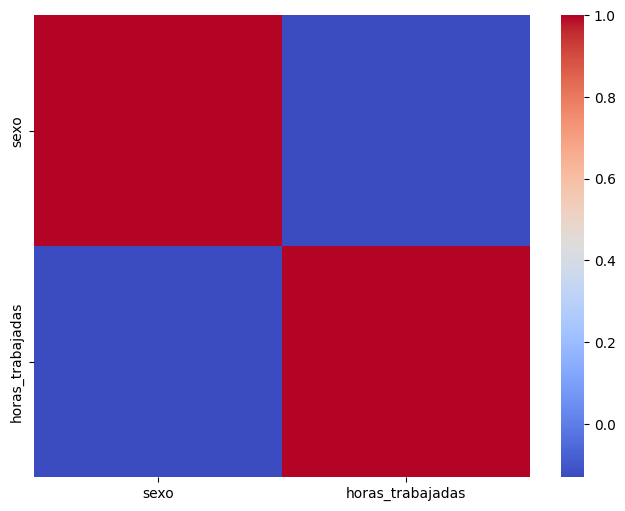

In [183]:
# Crear el heatmap
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, cmap = 'coolwarm')
plt.show()

<Axes: title={'center': 'Horas Trabajadas Por Sexo'}, xlabel='Sexo', ylabel='Horas Trabajadas'>

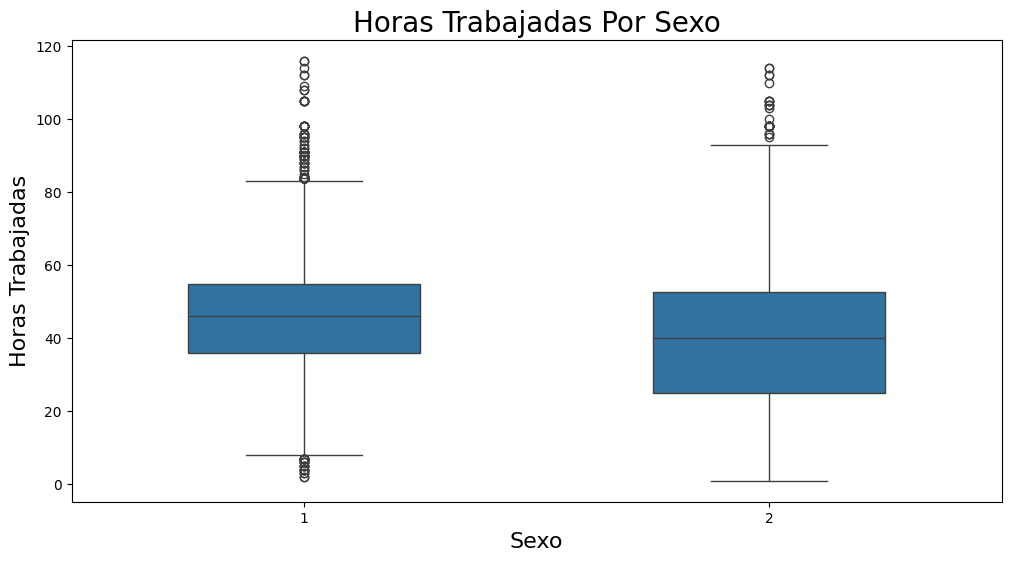

In [184]:
ax = sns.boxplot(data=df, y="horas_trabajadas", x="sexo", orient="v", width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Horas Trabajadas Por Sexo', fontsize=20)
ax.set_ylabel('Horas Trabajadas', fontsize=16)
ax.set_xlabel('Sexo', fontsize=16)
ax

## Distribución de frecuencias de la variable dependiente (y)

<Axes: title={'center': 'Distribución de Frecuencias'}, xlabel='horas_trabajadas', ylabel='Horas Trabajadas'>

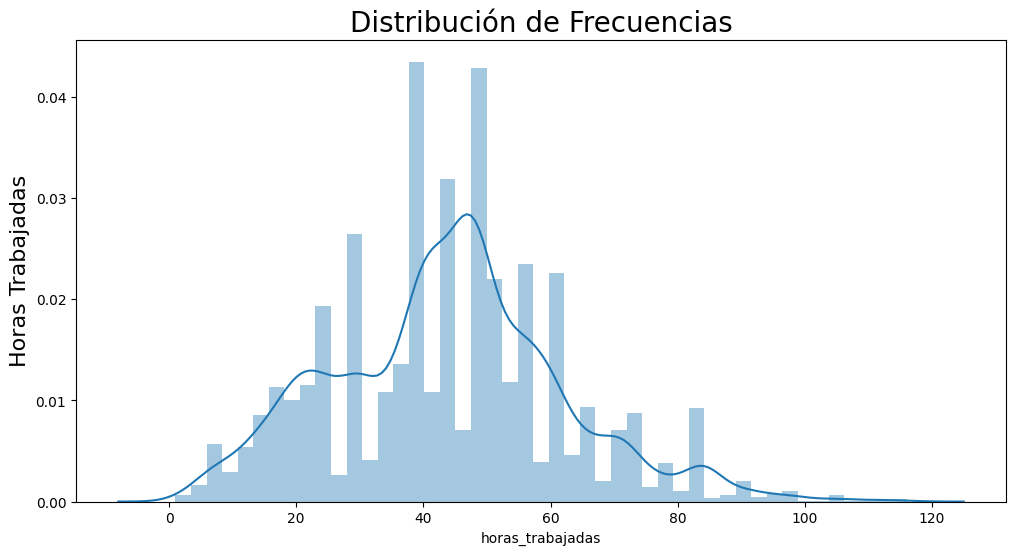

In [185]:
ax = sns.distplot(df['horas_trabajadas'])
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribución de Frecuencias", fontsize=20)
ax.set_ylabel("Horas Trabajadas", fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Estimando un Modelo de Regresión Lineal</font>

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
y = df["horas_trabajadas"]

In [189]:
X = df[["sexo"]]

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2811)

In [191]:
X_train.shape

(5940, 1)

In [192]:
X_test.shape

(2546, 1)

In [193]:
X_train.shape[0] + X_test.shape[0]

8486

<hr />

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [195]:
modelo = LinearRegression()

In [196]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO

In [197]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.02


## Generando previsiones para los datos de PRUEBA (X_test) utilizando el método *predict()* del objeto "modelo"

In [198]:
y_previsto = modelo.predict(X_test)

## Obteniendo el coeficiente de determinación (R²) para las previsiones del modelo

In [199]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.01
